In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles
import numpy as np



(10000, 28, 28)

In [102]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])


In [109]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

partition = 0.1
train_images = train_images[:int(len(train_images) * partition)]
train_labels = train_labels[:int(len(train_labels) * partition)]

# # Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


test_images.shape, train_images.shape

((10000, 28, 28), (6000, 28, 28))

In [113]:
# Build the model
model = Sequential([
    Dense(3, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images.reshape(6000, 784), train_labels, epochs=100, validation_split=0.2)

# Evaluate the model
# test_loss, test_acc = model.evaluate(test_images.reshape(10000, 784), test_labels)
# print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/100
150/150 [==============================] - 1s 2ms/step - loss: 2.0208 - accuracy: 0.3094 - val_loss: 1.8075 - val_accuracy: 0.3983
Epoch 2/100
150/150 [==============================] - 0s 1ms/step - loss: 1.6951 - accuracy: 0.4400 - val_loss: 1.5792 - val_accuracy: 0.4850
Epoch 3/100
150/150 [==============================] - 0s 1ms/step - loss: 1.5013 - accuracy: 0.4921 - val_loss: 1.4351 - val_accuracy: 0.5450
Epoch 4/100
150/150 [==============================] - 0s 1ms/step - loss: 1.3698 - accuracy: 0.5523 - val_loss: 1.3134 - val_accuracy: 0.6292
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 1.2615 - accuracy: 0.6098 - val_loss: 1.2178 - val_accuracy: 0.6533
Epoch 6/100
150/150 [==============================] - 0s 1ms/step - loss: 1.1776 - accuracy: 0.6327 - val_loss: 1.1542 - val_accuracy: 0.6658
Epoch 7/100
150/150 [==============================] - 0s 1ms/step - loss: 1.1144 - accuracy: 0.6583 - val_loss: 1.1083 - val_accuracy: 0.6725

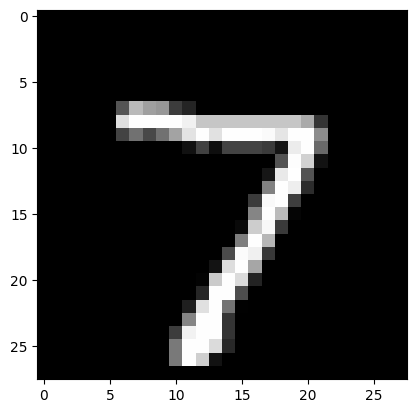

In [87]:
plt.imshow(test_images[0], cmap='gray') 

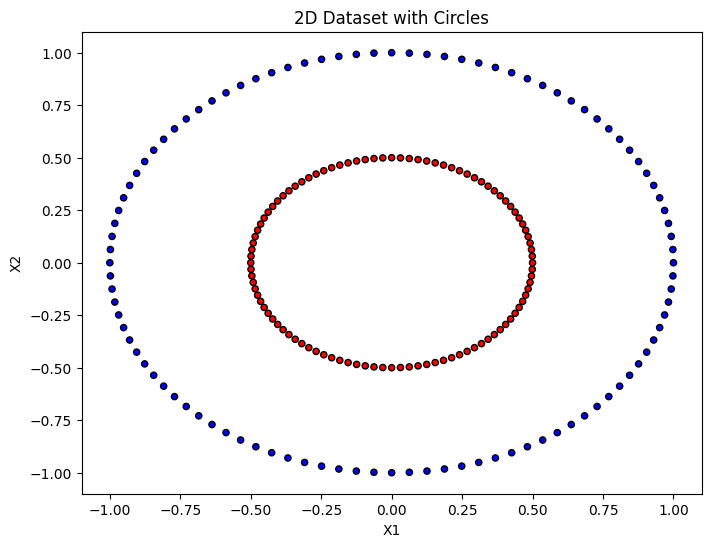

In [7]:
from sklearn.datasets import make_circles

# Generate circles dataset
X, y = make_circles(n_samples=200, noise=0, factor=0.5, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k', s=20)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Dataset with Circles')
plt.show()



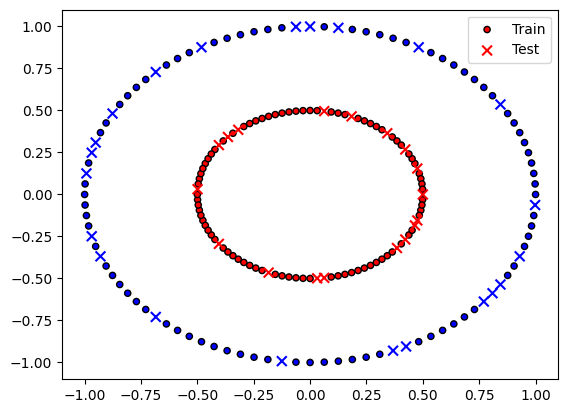

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolor='k', s=20, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.bwr, marker='x', s=50, label='Test')
plt.legend()

((160, 2), (160,))

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
5/5 [==============================] - 1s 45ms/step - loss: 0.6841 - accuracy: 0.4875 - val_loss: 0.6643 - val_accuracy: 0.5500
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6836 - accuracy: 0.4688 - val_loss: 0.6643 - val_accuracy: 0.6000
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6831 - accuracy: 0.4812 - val_loss: 0.6641 - val_accuracy: 0.6000
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6826 - accuracy: 0.4812 - val_loss: 0.6638 - val_accuracy: 0.6000
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6821 - accuracy: 0.4875 - val_loss: 0.6635 - val_accuracy: 0.6000
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6815 - accuracy: 0.4938 - val_loss: 0.6633 - val_accuracy: 0.6000
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6812 - accuracy: 0.5000 - val_loss: 0.6633 - val_accuracy: 0.6000
Epoch 8/100
5/5 [=========

In [11]:
model.predict(X_test[:5])

1/1 [==============================] - 0s 61ms/step


array([[0.54752564],
       [0.5606169 ],
       [0.5547387 ],
       [0.5946507 ],
       [0.519665  ]], dtype=float32)

In [10]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Plot decision boundary
plot_decision_boundary(model, X, y)


NameError: name 'np' is not defined

In [12]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu'),  
])

model.compile(
              loss='mse',
              metrics=['accuracy'])

x_train = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

y_train = [0, 0, 0, 1]  

history = model.fit(x_train, y_train, epochs=100, verbose=1)

model.evaluate(x_train, y_train)


Epoch 1/100
1/1 [==============================] - 0s 266ms/step - loss: 0.4524 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4508 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4487 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4479 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4458 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4452 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4446 - accuracy: 0.5000
Epoch 11/100
1/1 [=========

[0.40193524956703186, 0.5]

((240, 5),
 (240, 2),
 array([0., 1., 0., 0., 0.]),
 array([5.14486612, 2.83892488]))

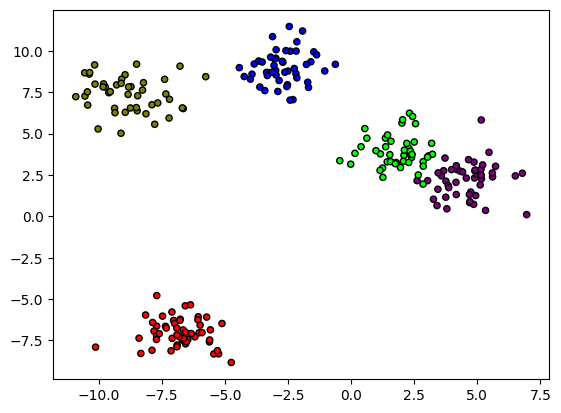

In [63]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Generate dataset with 5 classes
n_samples = 300
n_features = 2
n_classes = 5

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, cluster_std=1.0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolor='k', s=20)

encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))


y_train.shape, X_train.shape, y_train[0], X_train[0]

In [67]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from tensorflow.keras.optimizers import SGD

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 0s 23ms/step - loss: 1.6462 - accuracy: 0.3250 - val_loss: 1.4663 - val_accuracy: 0.4500
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 1.4662 - accuracy: 0.3875 - val_loss: 1.4183 - val_accuracy: 0.4500
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 1.4248 - accuracy: 0.5583 - val_loss: 1.3787 - val_accuracy: 0.5667
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 1.3919 - accuracy: 0.5542 - val_loss: 1.3431 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 1.3632 - accuracy: 0.7000 - val_loss: 1.3120 - val_accuracy: 0.7167
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 1.3380 - accuracy: 0.6958 - val_loss: 1.2847 - val_accuracy: 0.7667
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 1.3164 - accuracy: 0.5583 - val_loss: 1.2609 - val_accuracy: 0.7833
Epoch 8/100
8/8 [=========

1409/1409 [==============================] - 1s 587us/step


C:\Users\ferra\AppData\Local\Temp\ipykernel_35616\3626506960.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[np.argmax(y, axis=1) == cl, 0],


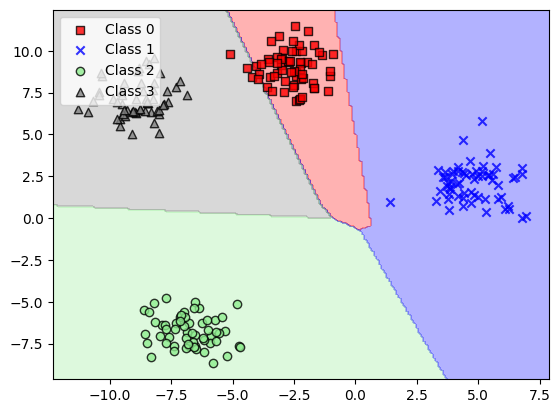

In [56]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_boundary(model, X, y, resolution=0.02):
    # Define the color maps
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(np.argmax(y, axis=1)))])

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Flatten the grid to pass it through the model
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict class probabilities for each point in the mesh grid
    Z = model.predict(grid)
    
    # Convert probabilities to class labels
    Z = np.argmax(Z, axis=1)
    
    # Reshape the results to match the mesh grid
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot the data points
    for idx, cl in enumerate(np.unique(np.argmax(y, axis=1))):
        plt.scatter(x=X[np.argmax(y, axis=1) == cl, 0], 
                    y=X[np.argmax(y, axis=1) == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    plt.legend(loc='upper left')
    plt.show()

# Example usage
# Assuming you have a trained model and data X, y
# model = ... # Your trained model
# X = ...     # Your input features
# y = ...     # Your one-hot encoded labels

plot_decision_boundary(model, X_train, y_train, 0.1)


In [39]:
model.predict(X_test[:5])

1/1 [==============================] - 0s 25ms/step


array([[0.9386284 , 0.06137159],
       [0.9408995 , 0.05910049],
       [0.94106644, 0.05893354],
       [0.875386  , 0.12461399],
       [0.11670231, 0.8832976 ]], dtype=float32)

In [38]:
plot_decision_boundary(model, X_train, y_train)

737/737 [==============================] - 0s 527us/step


ValueError: cannot reshape array of size 47120 into shape (152,155)

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])